# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
# Загружаем данные по курсам валют за 20 лет
rates = pd.read_csv('foreign_exchange_rates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [76]:
# Посмотрим какие у нас валюты и выделим в отдельный столбец год для группировки статистики по годам
valutes = rates.columns.tolist()[1:-1]
rates['year'] = rates['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
valutes

['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'THAILAND - BAHT/US$']

In [83]:
# Соберём статистику по валютам. Минимальные, максимальные значения за весь имеющийся период
# Соберём разницу между максимальным и минимальным значением, это насколько валюта стабильна
# Чем меньше разница, тем стабилнее валюта

valutes_min = []
valutes_max = []
valutes_delta = []
valutes_mean = []
dict_values_st = {}

def valute_st(data, valute):
    # Очистка и подготовка данных
    valute_date = data[data[valute] != 'ND']
    valute_date[valute] = valute_date[valute].astype(float)
    
    # Подсчет статистических данных
    valute_min = valute_date[valute].min()
    valute_max = valute_date[valute].max()
    valute_delta = valute_date[valute].max() - valute_date[valute].min()
    valute_mean = valute_date[valute].mean()
    
    # Запись статистических данных
    valutes_min.append(valute_min)
    valutes_max.append(valute_max)
    valutes_delta.append(valute_delta)
    valutes_mean.append(valute_mean)
    
    # Создание словаря обобщающего статистические данные
    # Словарь нужен для сортировки валют по статистическим показателям
    dict_values_st[valute] = [['valute_min',valute_min],['valute_max',valute_max],['valute_delta',valute_delta],['valute_mean',valute_mean]]
    
for val in valutes:
    valute_st(rates, val)

<ipython-input-83-3b4b1a7e401a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valute_date[valute] = valute_date[valute].astype(float)


In [84]:
# Сортировка валют по разнице между максимальным и минимальным значением / 'valute_delta'
# Показывает наиболее стабильные валюты, чьи колебания за 20 лет минимальны
list_v = list(dict_values_st.items())
list_v.sort(key=lambda i: i[1][2][1])

# Список валют отсортированный по коллебаниям курса от наименьшего к наибольшему
list_valute_sort = []

for i in range(len(list_v)):
    list_valute_sort.append(list_v[i][0])
list_valute_sort

['HONG KONG - HONG KONG DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'EURO AREA - EURO/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'SWITZERLAND - FRANC/US$',
 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'MALAYSIA - RINGGIT/US$',
 'CHINA - YUAN/US$',
 'BRAZIL - REAL/US$',
 'DENMARK - DANISH KRONE/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'SOUTH AFRICA - RAND/US$',
 'MEXICO - MEXICAN PESO/US$',
 'THAILAND - BAHT/US$',
 'INDIA - INDIAN RUPEE/US$',
 'JAPAN - YEN/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'KOREA - WON/US$']

In [78]:
# Отсортированные по колебаниям валюты со статистическими показателями
list_v

[('HONG KONG - HONG KONG DOLLAR/US$',
  [['valute_min', 7.7085],
   ['valute_max', 7.8499],
   ['valute_delta', 0.14139999999999997],
   ['valute_mean', 7.782637955768076]]),
 ('UNITED KINGDOM - UNITED KINGDOM POUND/US$',
  [['valute_min', 0.4738],
   ['valute_max', 0.8287],
   ['valute_delta', 0.3549],
   ['valute_mean', 0.6403719864514823]]),
 ('EURO AREA - EURO/US$',
  [['valute_min', 0.6246],
   ['valute_max', 1.2092],
   ['valute_delta', 0.5846],
   ['valute_mean', 0.8439044032675848]]),
 ('SINGAPORE - SINGAPORE DOLLAR/US$',
  [['valute_min', 1.2007],
   ['valute_max', 1.854],
   ['valute_delta', 0.6533],
   ['valute_mean', 1.4803983462841217]]),
 ('CANADA - CANADIAN DOLLAR/US$',
  [['valute_min', 0.9168],
   ['valute_max', 1.6128],
   ['valute_delta', 0.6960000000000001],
   ['valute_mean', 1.2303378561466438]]),
 ('SWITZERLAND - FRANC/US$',
  [['valute_min', 0.7296],
   ['valute_max', 1.825],
   ['valute_delta', 1.0954],
   ['valute_mean', 1.1504612871089859]]),
 ('AUSTRALIA - A

[0.14139999999999997, 0.3549, 0.5846, 0.6533, 0.6960000000000001, 1.0954, 1.1643999999999999, 1.4164, 1.5590000000000006, 2.2398]


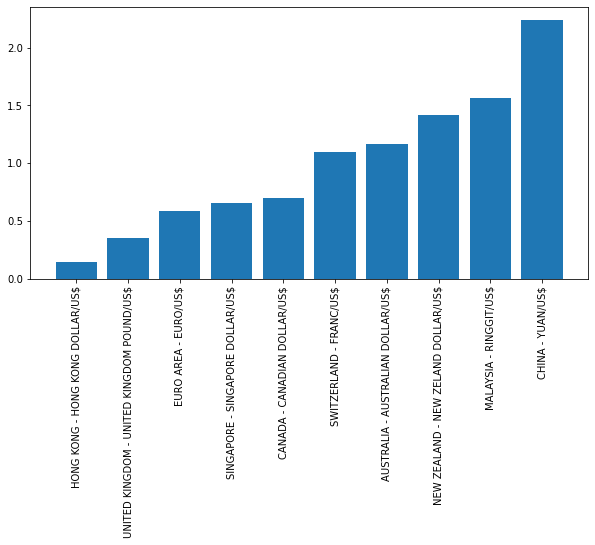

In [94]:
# График размера колебаний 10 самых стабильных валют
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
valutes_delta = []
x = list(x for x in range(10))
years = rates['year'].unique().tolist()
for i,v in enumerate(list_valute_sort[:-12]):
    valutes_delta.append(list_v[i][1][2][1])
print(valutes_delta)
ax.bar(x,height=valutes_delta)
ax.set_xticks(x)
ax.set_xticklabels(list_valute_sort[:-12], rotation=90)
plt.show()

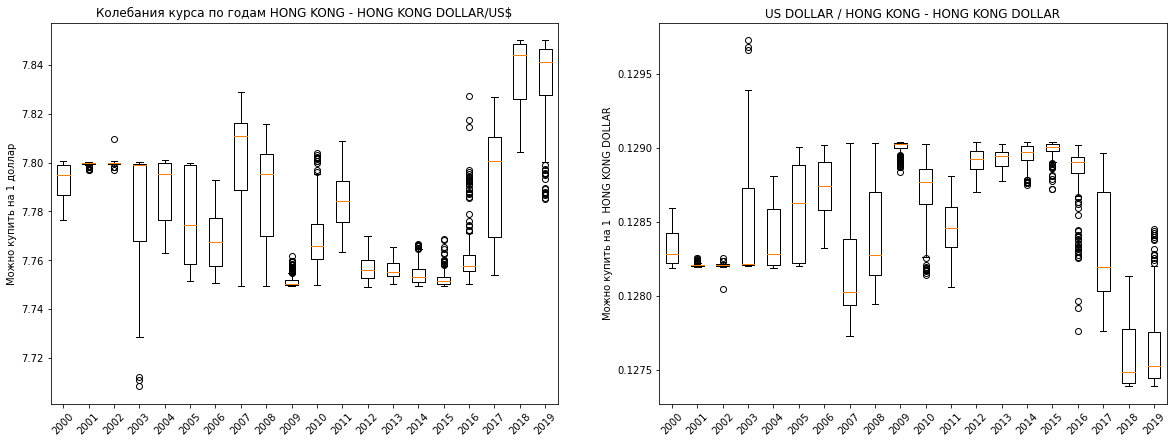

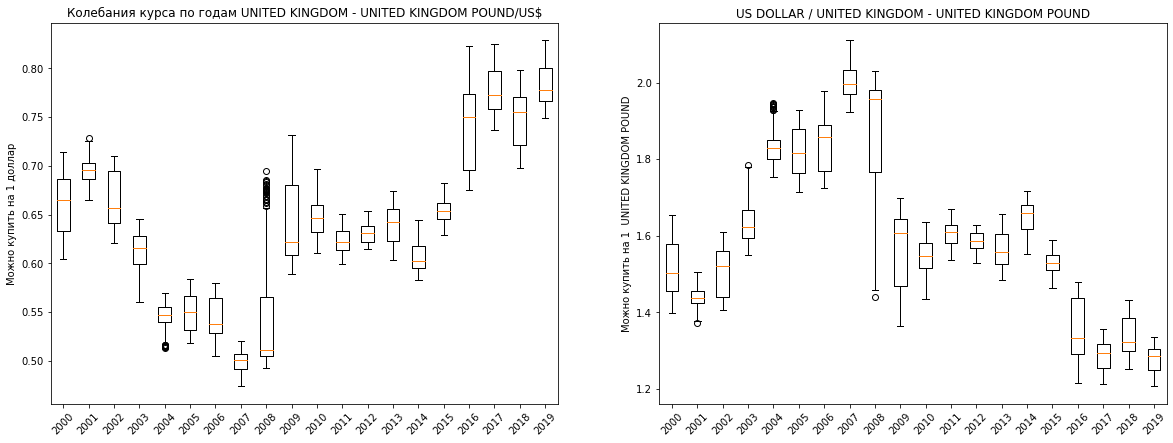

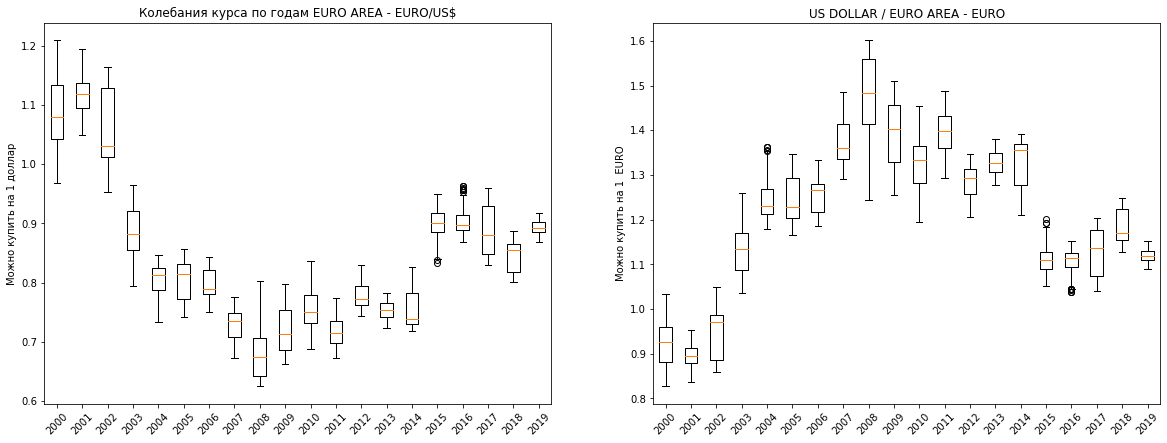

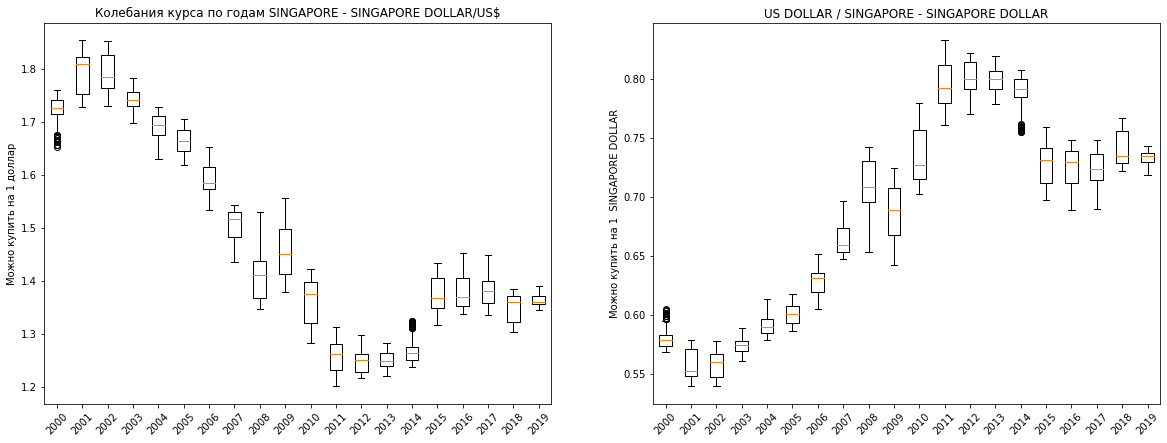

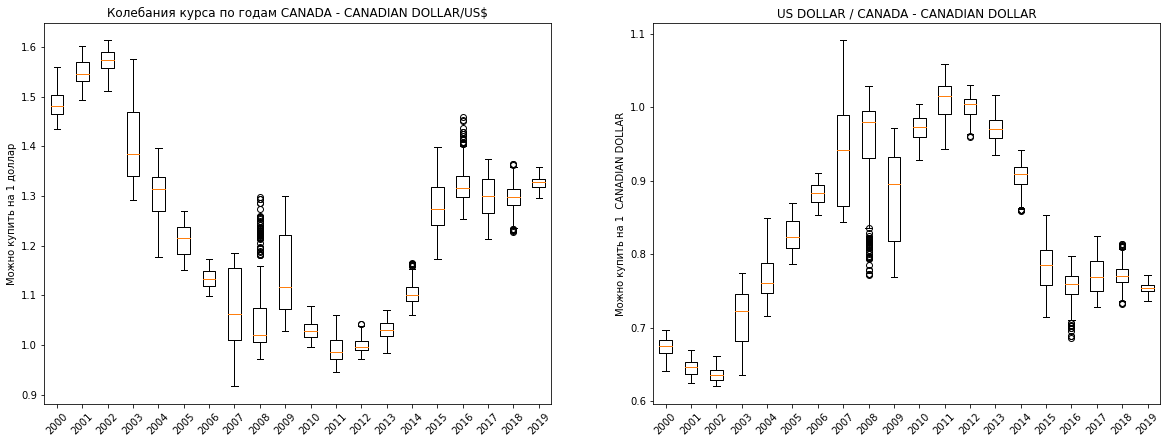

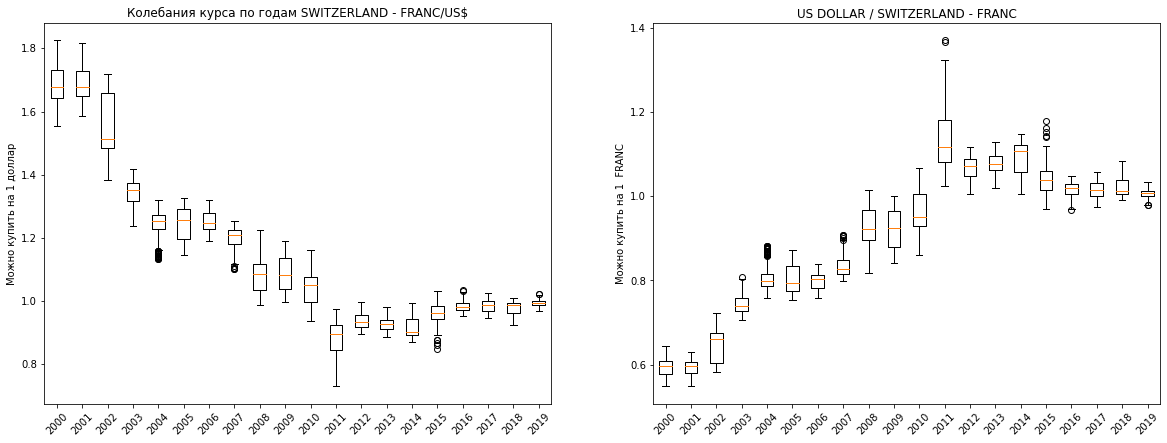

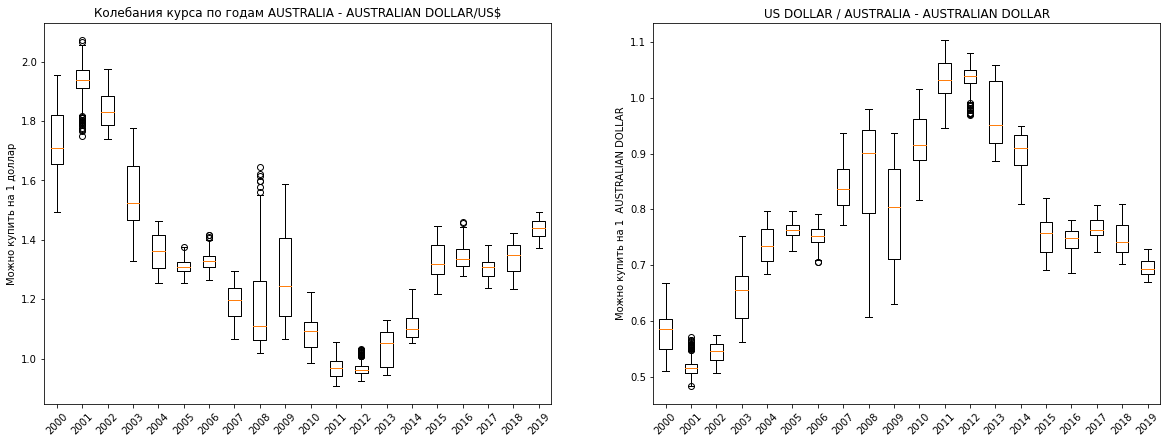

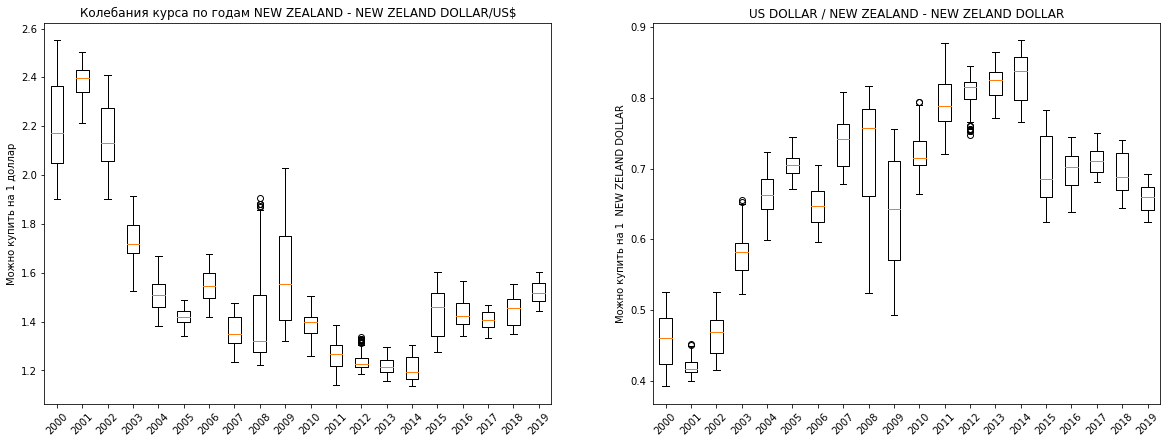

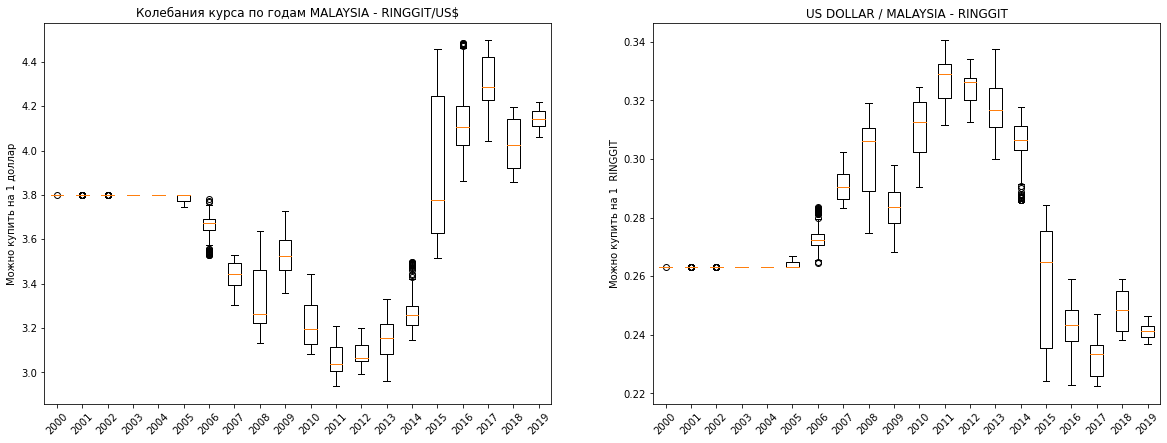

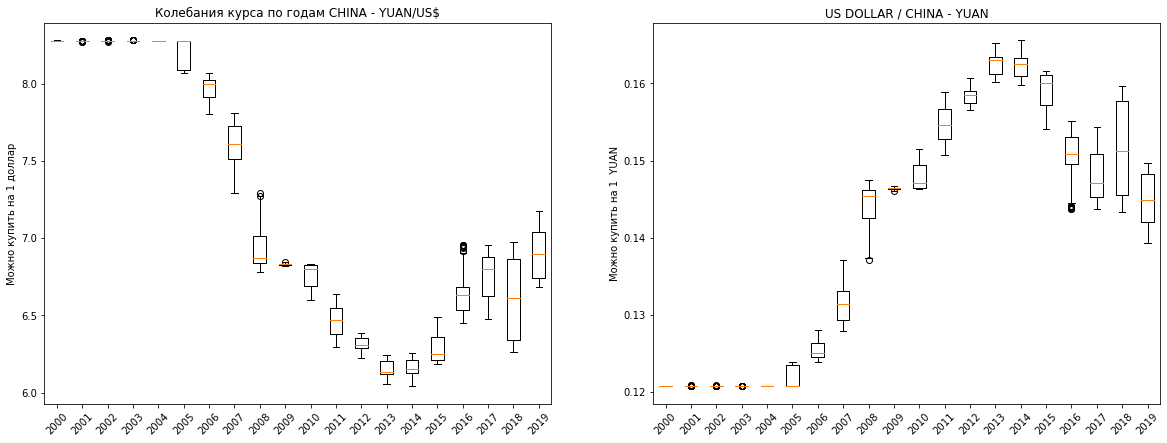

'\nНа каждую валюту мы построили два графика\n________________________________________________________\nПервый отношение валюты к доллару\n \nПримеры: \nвалюта 0.5 - значит, за 1 валюту можно купить 2 доллара\nвалюта 10 - значит, за 10 ед. валюты можно купить 1 доллар\n\nВывод:\nЧем меньше значение валюты к доллару, тем крепче валюта\nХорошо если первый график ровный или идёт на спад\n\n________________________________________________________\nВторой отношение доллара к валюте\n\nПримеры: \nдоллар 0.5 - значит, за 1 доллар можно купить 2 валюты\nдоллар 10 - значит, за 10 долларов можно купить 1 валюту\n\nВывод:\nЧем больше значение доллара к валюте, тем валюта сильнее\nХорошо если второй график ровный или идёт на повышение\n\n'

In [103]:
def boxplot_years(data, currency):
    cur_data = data[['Time Serie', currency]]
    cur_data = cur_data[cur_data[currency] != 'ND']
    cur_data[currency] = cur_data[currency].astype(float)
    cur_data['year'] = cur_data['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)

    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    years = cur_data['year'].unique().tolist()

    box = []
    for year in years:
        box.append(cur_data[cur_data['year'] == year][currency])
    ax1.boxplot(box)
    ax1.set_xticklabels(years, rotation=45)
    ax1.set_title(f'Колебания курса по годам {currency}')
    ax1.set_ylabel('Можно купить на 1 доллар')


    box_us = []
    cur_data['US'] = 1/cur_data[currency]
    for year in years:
        box_us.append(cur_data[cur_data['year'] == year]['US'])
    ax2.boxplot(box_us)
    ax2.set_xticklabels(years, rotation=45)
    ax2.set_title(f'US DOLLAR / {currency[:-4]}')
    ax2.set_ylabel(f'Можно купить на 1 {currency.split("-")[1][:-4]}')

    plt.show()

for currency in list_valute_sort[:-12]:
    if currency == 'Time Serie':
        pass
    boxplot_years(rates, currency)
    
"""
На каждую валюту мы построили два графика
________________________________________________________
Первый отношение валюты к доллару
 
Примеры: 
валюта 0.5 - значит, за 1 валюту можно купить 2 доллара
валюта 10 - значит, за 10 ед. валюты можно купить 1 доллар

Вывод:
Чем меньше значение валюты к доллару, тем крепче валюта
Хорошо если первый график ровный или идёт на спад

________________________________________________________
Второй отношение доллара к валюте

Примеры: 
доллар 0.5 - значит, за 1 доллар можно купить 2 валюты
доллар 10 - значит, за 10 долларов можно купить 1 валюту

Вывод:
Чем больше значение доллара к валюте, тем валюта сильнее
Хорошо если второй график ровный или идёт на повышение

"""

In [108]:
best_list = ['SINGAPORE - SINGAPORE DOLLAR/US$', 'SWITZERLAND - FRANC/US$', 'CHINA - YUAN/US$', 'HONG KONG - HONG KONG DOLLAR/US$']

In [113]:
for best in best_list:
    print(best)
    print(rates[best].iloc[0])
    print(rates[best].iloc[-1])
    
print(rates[rates[[best_list]]].head())

SINGAPORE - SINGAPORE DOLLAR/US$
1.6563
1.3446
SWITZERLAND - FRANC/US$
1.5808
0.9677
CHINA - YUAN/US$
8.2798
6.9618
HONG KONG - HONG KONG DOLLAR/US$
7.7765
7.7894


KeyError: "None of [Index([('SINGAPORE - SINGAPORE DOLLAR/US$', 'SWITZERLAND - FRANC/US$', 'CHINA - YUAN/US$', 'HONG KONG - HONG KONG DOLLAR/US$')], dtype='object')] are in the [columns]"